## Observations and Insights

1. The Tumor Volume having a very high correlation with the weight of the mice in grams has a positively upward sloping trend.
2. For the drug regimen capomulin the tumor volume rapidly decreased with time.
3. With an extremely low p-value, the weight is an excellent indicator o

## Dependencies and starter code

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots Using Pandas

Text(0, 0.5, 'Number of Data Points')

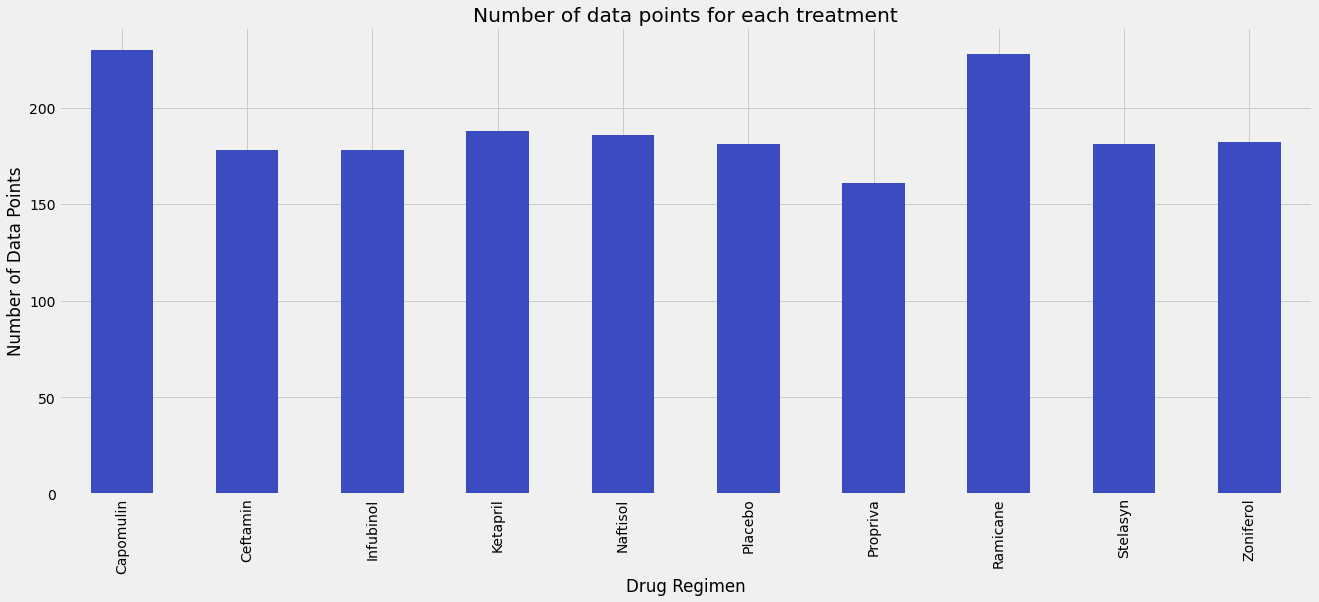

In [44]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
style.use('fivethirtyeight')
drugreg = merge_table.groupby(['Drug Regimen'])['Drug Regimen'].count()
drugreg.plot(kind='bar', figsize=[20,8],cmap='coolwarm')
plt.title('Number of data points for each treatment')
plt.ylabel('Number of Data Points')

## Bar Plot Using Pyplot

Text(81.2, 0.5, 'Number of Data Points')

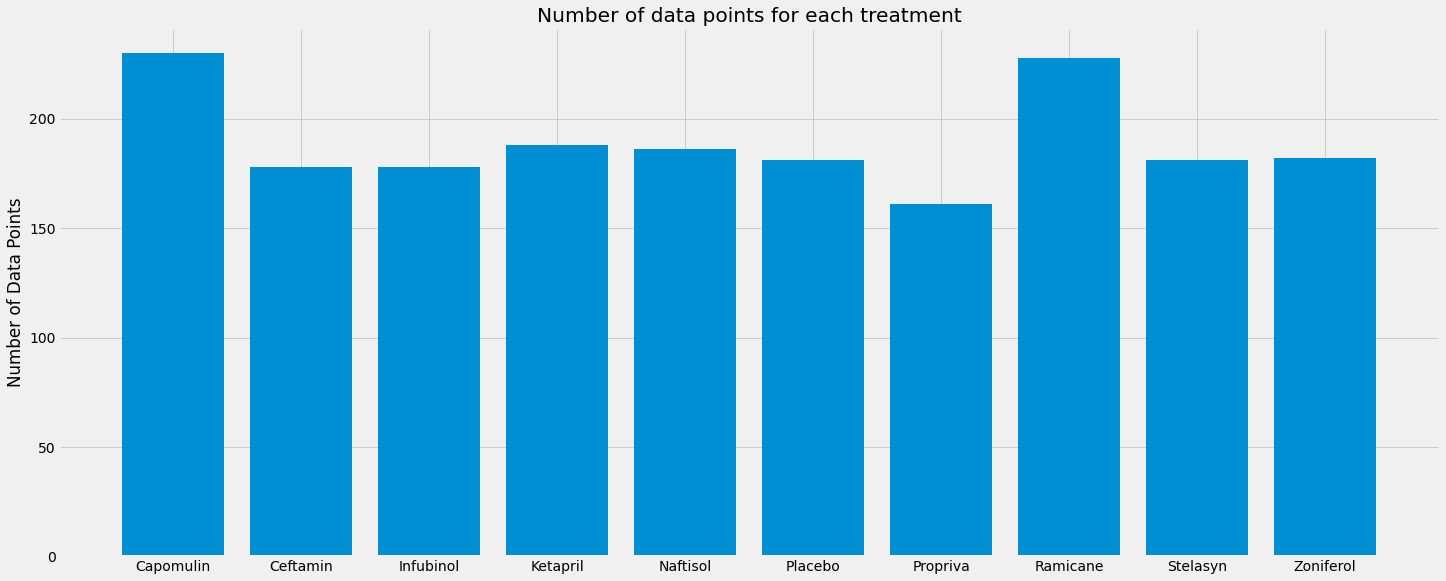

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
style.use('fivethirtyeight')
height=[]
for i in drugreg:
    x =i
    height.append(x)
    
plt.figure(figsize=[20,8])
plt.bar(drugreg.index, height=height)
plt.tight_layout()
plt.title('Number of data points for each treatment')
plt.ylabel('Number of Data Points')


## Pie Plots Using Pandas

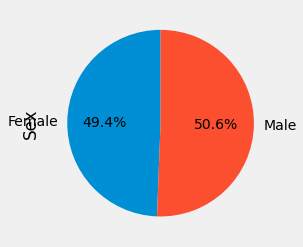

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexvar = merge_table.groupby(['Sex'])['Sex'].count()
sexvar.plot(kind='pie', autopct='%1.1f%%',startangle=90)
plt.show()

## Pie Plots Using Pyplot

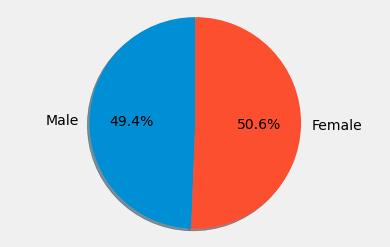

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = merge_table['Sex'].unique()
sizes = merge_table.groupby(['Sex'])['Sex'].count()
 

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
cap = merge_table[merge_table['Drug Regimen']=='Capomulin']
ram = merge_table[merge_table['Drug Regimen']=='Ramicane']
inf = merge_table[merge_table['Drug Regimen']=='Infubinol']
cef = merge_table[merge_table['Drug Regimen']=='Ceftamin']
boxdf = pd.concat([cap, ram, inf, cef], axis=0)
boxdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [49]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
upqcap = cap['Tumor Volume (mm3)'].quantile(0.75)
loqcap = cap['Tumor Volume (mm3)'].quantile(0.25)
iqr = upqcap - loqcap
print(f"The lower quartile for Tumour Volume for Capomulin is: {loqcap}")
print(f"The upper quartile for Tumour Volume for Capomulin is: {upqcap}")
print(f"The interquartile range of Tumor Volumes for Capomulin is: {iqr}")
print(f"The the median of tumor volumes is: {cap['Tumor Volume (mm3)'].quantile(0.5)} ")

lower_bound = loqcap - (1.5*iqr) #the wiskers
upper_bound = upqcap + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumour Volume for Capomulin is: 37.685932865
The upper quartile for Tumour Volume for Capomulin is: 45.0
The interquartile range of Tumor Volumes for Capomulin is: 7.314067135000002
The the median of tumor volumes is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [50]:
upqram = ram['Tumor Volume (mm3)'].quantile(0.75)
loqram = ram['Tumor Volume (mm3)'].quantile(0.25)
iqrram = upqram - loqram
print(f"The lower quartile for Tumour Volume for Ramicane is: {loqram}")
print(f"The upper quartile for Tumour Volume for Ramicane is: {upqram}")
print(f"The interquartile range of Tumor Volumes for Ramicane is: {iqrram}")
print(f"The the median of tumor volumes is: {ram['Tumor Volume (mm3)'].quantile(0.5)} ")

lower_bound = loqram - (1.5*iqrram)
upper_bound = upqram + (1.5*iqrram)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumour Volume for Ramicane is: 36.67463458499999
The upper quartile for Tumour Volume for Ramicane is: 45.0
The interquartile range of Tumor Volumes for Ramicane is: 8.325365415000007
The the median of tumor volumes is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [51]:
upqinf = inf['Tumor Volume (mm3)'].quantile(0.75)
loqinf = inf['Tumor Volume (mm3)'].quantile(0.25)
iqrinf = upqinf - loqinf
print(f"The lower quartile for Tumour Volume for Infubinol is: {loqinf}")
print(f"The upper quartile for Tumour Volume for Infubinol is: {upqinf}")
print(f"The interquartile range of Tumor Volumes for Infubinol is: {iqrinf}")
print(f"The the median of tumor volumes is: {inf['Tumor Volume (mm3)'].quantile(0.5)} ")

lower_bound = loqinf - (1.5*iqrinf)
upper_bound = upqinf + (1.5*iqrinf)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumour Volume for Infubinol is: 47.3123533
The upper quartile for Tumour Volume for Infubinol is: 57.314443967500004
The interquartile range of Tumor Volumes for Infubinol is: 10.002090667500006
The the median of tumor volumes is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [52]:
upqcef = cef['Tumor Volume (mm3)'].quantile(0.75)
loqcef = cef['Tumor Volume (mm3)'].quantile(0.25)
iqrcef = upqcef - loqcef
print(f"The lower quartile for Tumour Volume for Ceftamin is: {loqcef}")
print(f"The upper quartile for Tumour Volume for Ceftamin is: {upqcef}")
print(f"The interquartile range of Tumor Volumes for Ceftamin is: {iqrcef}")
print(f"The the median of tumor volumes is: {cef['Tumor Volume (mm3)'].quantile(0.5)} ")

lower_bound = loqcef - (1.5*iqrcef)
upper_bound = upqcef + (1.5*iqrcef)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumour Volume for Ceftamin is: 47.208427112500004
The upper quartile for Tumour Volume for Ceftamin is: 56.801437570000004
The interquartile range of Tumor Volumes for Ceftamin is: 9.5930104575
The the median of tumor volumes is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


Text(0, 0.5, 'Millimiter Cube (mm3)')

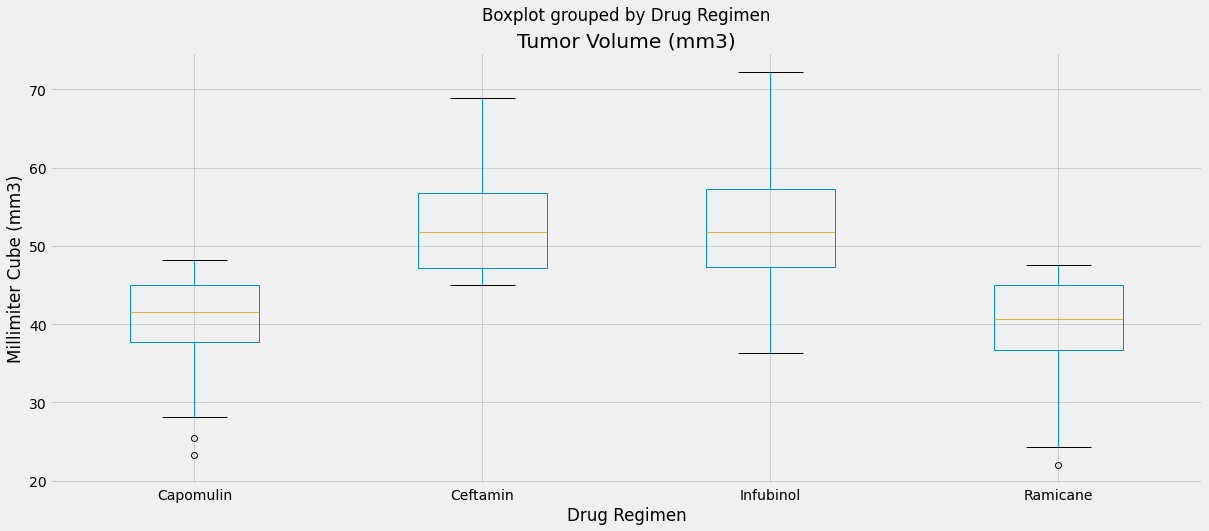

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxdf.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=[20,8])
plt.ylabel('Millimiter Cube (mm3)')

# Line Plot

Text(0, 0.5, 'Tumor Volume (mm3)')

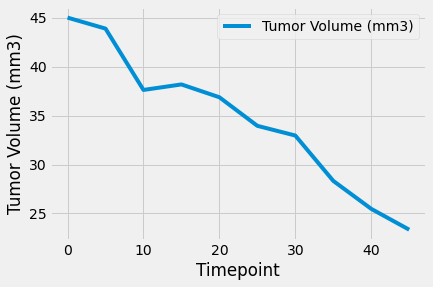

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capsortime = cap[cap['Mouse ID']=='s185'].sort_values(by='Timepoint')
capsortime.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')

# Scatter Plot

Text(0.5, 1.0, 'Weight versus Tumor Volume')

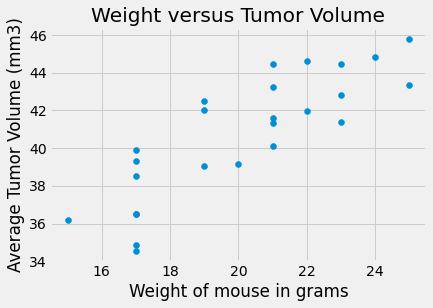

In [55]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
forscatter = cap.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
scatterdf = pd.DataFrame(forscatter)
scatterdf1 = scatterdf.reset_index()
plt.scatter(x=scatterdf1['Weight (g)'], y=scatterdf1['Tumor Volume (mm3)'])
plt.xlabel('Weight of mouse in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight versus Tumor Volume')


In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Correlation_weight_tumorvol = scatterdf1[['Weight (g)', 'Tumor Volume (mm3)']].corr().iloc[1,0]
Correlation_weight_tumorvol
print('The Correlation Coefficient between Weight in grams and Tumor Volume in cubic milimetres is {}'.format(Correlation_weight_tumorvol))

The Correlation Coefficient between Weight in grams and Tumor Volume in cubic milimetres is 0.8419363424694718


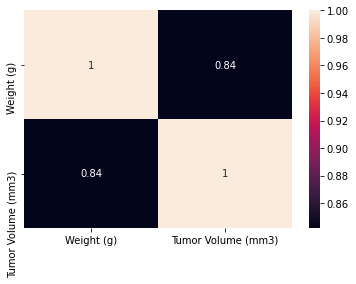

In [37]:
import seaborn as sns
sns.heatmap(scatterdf1.corr(), annot=True)

In [56]:
from scipy.stats import linregress
x_val = scatterdf1['Weight (g)']
y_val = scatterdf1['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
print('slope is {}'.format(slope))
print('intercept is {}'.format(intercept))
print('rvalueis {}'.format(rvalue))
print('pvalue is {}'.format(pvalue))
print('standard error is {}'.format(stderr))
print('The regression equation is y = {}*x + {}'.format(slope, intercept))

slope is 0.9544396890241045
intercept is 21.552160532685015
rvalueis 0.8419363424694718
pvalue is 1.3225722434712642e-07
standard error is 0.1275435903320134
The regression equation is y = 0.9544396890241045*x + 21.552160532685015


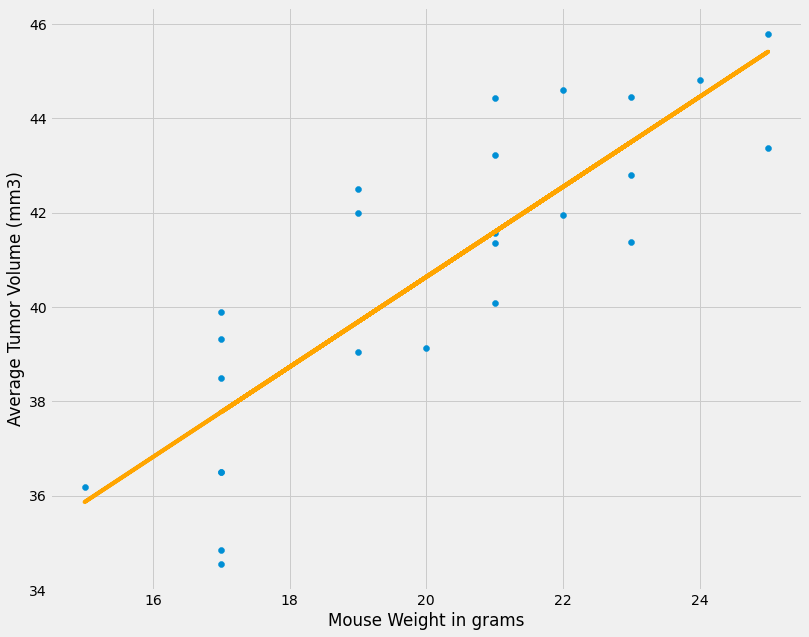

In [59]:
yout = x_val * slope + intercept

plt.figure(figsize=(12, 10))
plt.scatter(x_val,y_val)
plt.plot(x_val,yout,"orange")


plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()